In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
import pathlib
from matplotlib import pyplot as plt
import cv2 as cv

In [2]:
# train_path = './mnist_image_label/mnist_train_jpg_60000/'
# train_txt = './mnist_image_label/mnist_train_jpg_60000.txt'
x_train_savepath = './air_lake_x_train.npy'
y_train_savepath = './air_lake_y_train.npy'

# test_path = './mnist_image_label/mnist_test_jpg_10000/'
# test_txt = './mnist_image_label/mnist_test_jpg_10000.txt'
x_test_savepath = './air_lake_x_test.npy'
y_test_savepath = './air_lake_y_test.npy'
pathRoot = './datasets/air_lake'

In [3]:
pathRoot = pathlib.Path(pathRoot)

In [4]:
import random
random.seed(1)
all_image_path = pathRoot.glob('*/*')
all_image_path = [str(path) for path in all_image_path]
random.shuffle(all_image_path)
image_count = len(all_image_path)
print(image_count)

1400


In [ ]:
print(all_image_path[:5])
label_names = sorted(item.name for item in pathRoot.glob('*/') if item.is_dir())
label_to_index = dict((name, index) for index, name in enumerate(label_names))
index_to_label=dict((index,name) for name,index in label_to_index.items())
all_image_label = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_path]
print(all_image_label[:5])
all_image_with_label = zip(all_image_path,all_image_label)
# print(list(all_image_with_label)[0])

['datasets/air_lake/lake/lake_572.jpg', 'datasets/air_lake/lake/lake_451.jpg', 'datasets/air_lake/airplane/airplane_506.jpg', 'datasets/air_lake/lake/lake_347.jpg', 'datasets/air_lake/airplane/airplane_064.jpg']


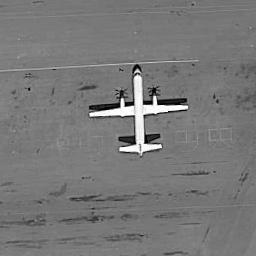

In [6]:
print(all_image_path[:5])
for i in all_image_path[4:5]:
    img = Image.open(i)
    img = img.convert('L')
    display(img)

In [7]:
def generate(all_image_path,all_image_label):
    x, y_ = [], []  # 建立空列表
    for img_path,label in all_image_path,all_image_label:
        img = Image.open(img_path)  # 读入图片
        img = np.array(img.convert('L'))  # 图片变为8位宽灰度值的np.array格式
        img = img / 255.  # 数据归一化 （实现预处理）
        x.append(img)  # 归一化后的数据，贴到列表x
        y_.append(label)
        print(img_path,label)
    x = np.array(x)  # 变为np.array格式
    y_ = np.array(y_)  # 变为np.array格式
    y_ = y_.astype(np.int6x4)  # 变为64位整型
    return x, y_  # 返回输入特征x，返回标签y_

(-0.5, 255.5, 255.5, -0.5)

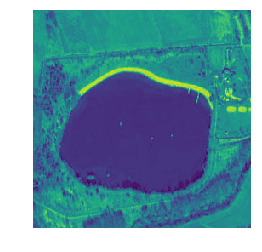

In [8]:
img = cv.imread(all_image_path[0])
img2 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img2)
plt.axis("off")

In [9]:
!pip3 install pillow

Looking in indexes: http://mirrors.tencentyun.com/pypi/simple
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
if os.path.exists(x_train_savepath) and os.path.exists(y_train_savepath):
    print('-------------Load Datasets-----------------')
    x_train_save = np.load(x_train_savepath)
    y_train = np.load(y_train_savepath)
    x_test_save = np.load(x_test_savepath)
    y_test = np.load(y_test_savepath)
    x_train = np.reshape(x_train_save, (len(x_train_save), 28, 28))
    x_test = np.reshape(x_test_save, (len(x_test_save), 28, 28))
else:
    print('-------------Generate Datasets-----------------')
    x_train, y_train = generate(all_image_path, all_image_path)

    print('-------------Save Datasets-----------------')
    x_train_save = np.reshape(x_train, (len(x_train), -1))
    x_test_save = np.reshape(x_test, (len(x_test), -1))
    np.save(x_train_savepath, x_train_save)
    np.save(y_train_savepath, y_train)


-------------Generate Datasets-----------------


ValueError: too many values to unpack (expected 2)